In [1]:
! pip install pandas pyarrow
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/31/9e/6ebb433de864a6cd45716af52a4d7a8c3c9aaf3a98368e61db9e69e69a9c/pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/ab/32/340238be1eb5037e7b5de7e640ee22334417239bc347eadefaf8c373936d/pyarrow-20.0.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.22.4 from https://files.pythonhosted.org/packages/b6/f5/467ca8675c7e6c567f571d8db942cc10a87588bd9e20a909d8af4171edda/numpy-2.2.5-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/81/c4/34e93fe5f5429d7570ec1fa436f1986fb1f00c3e0f43a589fe2bbcd22c3f/pytz-2025.2-py2.py3-none-any.whl.metadata
  Obtaining dependenc

In [1]:
import pandas as pd
import os

In [2]:
# Directory containing your parquet files
train_dir = 'train'
process_files = sorted([f for f in os.listdir(train_dir) if f.startswith('incoming_run_data')])
metrology_files = sorted([f for f in os.listdir(train_dir) if f.startswith('metrology_data')])

In [3]:
# Example: Load the first process and metrology file
process_df = pd.read_parquet(os.path.join(train_dir, process_files[0]))
metrology_df = pd.read_parquet(os.path.join(train_dir, metrology_files[0]))

print("Process data sample:")
print(process_df.head())
print("\nMetrology data sample:")
print(metrology_df.head())

Process data sample:
                                Tool ID Run Start Time        Run End Time  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   

                                 Run ID                          Process Step  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   

  Step ID              

In [4]:
print("Process data columns:", process_df.columns)
print("Metrology data columns:", metrology_df.columns)

print("\nProcess data info:")
print(process_df.info())

print("\nMetrology data info:")
print(metrology_df.info())

print("\nProcess data description:")
print(process_df.describe(include='all'))

Process data columns: Index(['Tool ID', 'Run Start Time', 'Run End Time', 'Run ID', 'Process Step',
       'Step ID', 'Time Stamp', 'Sensor Name', 'Sensor Value'],
      dtype='object')
Metrology data columns: Index(['Run ID', 'Run Start Time', 'Run End Time', 'X_index', 'Y_index', 'X',
       'Y', 'Point Index', 'Measurement'],
      dtype='object')

Process data info:
<class 'pandas.core.frame.DataFrame'>
Index: 4469164 entries, 0 to 4975062
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Tool ID         object        
 1   Run Start Time  datetime64[ns]
 2   Run End Time    datetime64[ns]
 3   Run ID          object        
 4   Process Step    object        
 5   Step ID         object        
 6   Time Stamp      datetime64[ns]
 7   Sensor Name     object        
 8   Sensor Value    float32       
dtypes: datetime64[ns](3), float32(1), object(5)
memory usage: 323.9+ MB
None

Metrology data info:
<class 'pandas.core.fram

In [6]:
# Load all process files into a single DataFrame (if not too large)
all_process_df = pd.concat([
    pd.read_parquet(os.path.join(train_dir, f)) for f in process_files  # Adjust number as needed
], ignore_index=True)

print(all_process_df.head())

# Similarly for metrology data
all_metrology_df = pd.concat([
    pd.read_parquet(os.path.join(train_dir, f)) for f in metrology_files
], ignore_index=True)

print(all_metrology_df.head())  

                                Tool ID Run Start Time        Run End Time  \
0  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
1  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
2  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
3  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   
4  8060e8e1-504a-5138-a9f0-e2770bd61ba1     2023-12-31 2023-12-31 00:12:22   

                                 Run ID                          Process Step  \
0  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
1  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
2  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
3  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   
4  6515456b-05d4-5e6d-b42a-7652a8d671a4  22c8716b-1c14-525a-8c0a-0473ec7aa99e   

  Step ID                    Time Stamp Sens

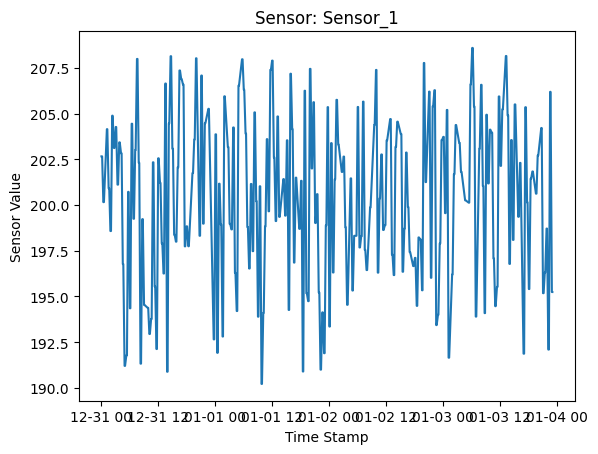

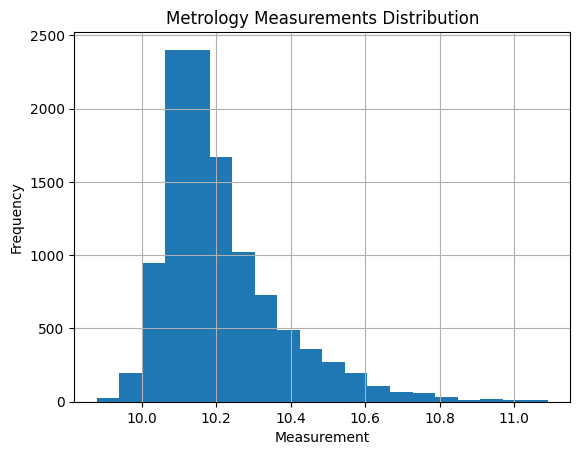

In [8]:
import matplotlib.pyplot as plt

# Plot a sensor value over time for a single run
sensor_name = process_df['Sensor Name'].unique()[0]
df_sensor = process_df[process_df['Sensor Name'] == sensor_name]
plt.plot(df_sensor['Time Stamp'], df_sensor['Sensor Value'])
plt.xlabel('Time Stamp')
plt.ylabel('Sensor Value')
plt.title(f'Sensor: {sensor_name}')
plt.show()

# Plot distribution of measurements
metrology_df['Measurement'].hist(bins=20)
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.title('Metrology Measurements Distribution')
plt.show()